<a href="https://colab.research.google.com/github/czambrano26/MAT-421/blob/main/ModuleB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recall that regression assumes that the data set has measurement errors. We then have to find a set of model parameters that minimize ther error between our model and the data. 

When we have measurements that are assumed to be very reliable, we instead want an estimation function that goes through the data points we have. This is interpolation.


Section 17.1: Interpolation Problem Statement

---
Assume we have a data set of independent x_i values and dependent y_i values. We can use interpolation to find an estimation function such that y(x_i) = y_i. 

Interpolation does not require an underlying model for the data since there are many reliable data points (However, the processes that underly the data should inform the user about the quality of the interpolation).

Below is a figure that that shows the interpolation problem statement. The interpolation function can be used to estimate the value of points within the range of the data set. In this graph, the red dot is the true y-value that we can estimate the value of.

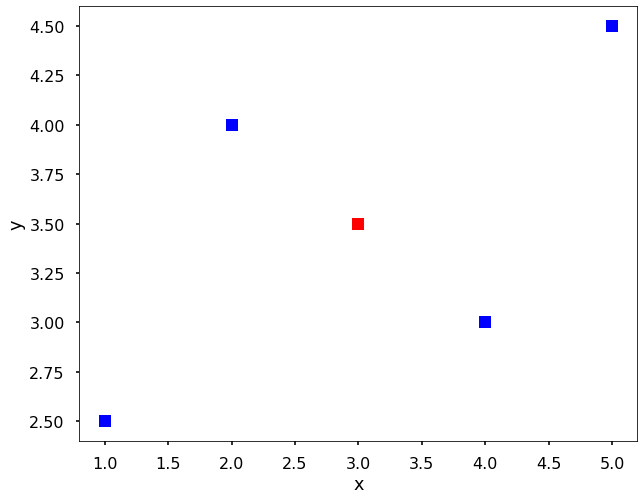

In [ ]:
import matplotlib.pyplot as plt

x = [1,2,4,5]
y = [2.5,4,3,4.5]
plt.figure(figsize = (10,8)) 
plt.plot(x, y, 's', color='blue')
plt.plot(3, 3.5, 's', color='red')
plt.xlabel('x') 
plt.ylabel('y') 
plt.show()

Section 17.2: Linear Interpolation

---

In linear interpolation, the estimated point is assumed to line on the line between the nearest left and right point. 

Assume that the x data points are in ascending order, x_i < x_(i+1).

Let x be a point such that x_i < x < x_(i+1).

Then, the linear interpolation at x is y(x) = y_i + [(y_(i+1) - y_i)(x - x_i)] / [ (x_(i+1) -x_i) ]

Find the linear interpolation at x=1.2 based on the data x=[0, 2, 3], y=[2, 5, 7]. Verify the result using scipy's function interp1d. 

In [ ]:
from scipy.interpolate import interp1d 
import matplotlib.pyplot as plt 
 
plt.style.use('seaborn-poster') 

x = [0, 2, 3] 
y = [5, 3, 7]
 
f = interp1d(x, y) 
y_hat = f(1.2) 
print(y_hat) 

3.8


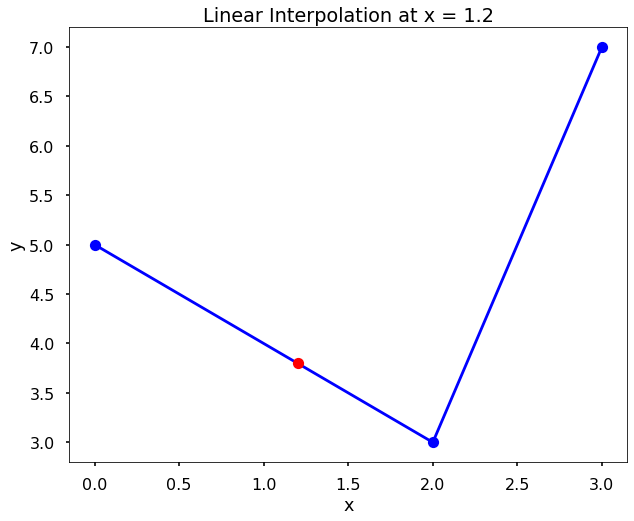

In [ ]:
plt.figure(figsize = (10,8)) 
plt.plot(x, y, '-ob') 
plt.plot(1.2, y_hat, 'ro') 
plt.title('Linear Interpolation at x = 1.2') 
plt.xlabel('x') 
plt.ylabel('y') 
plt.show() 

Section 17.3: Cubic Spline Interpolation

---

In cubic spline interpolation, the interpolating function is a set of piecewise cubic functions. 

We assume that the points (x_i, y_i) and (x_(i+1), y_(i+1)) are joined by a cubic polynomial, S_i(x) = a_i * x^3 + b_i * x^2 + c_i * x + d_i. 

To find the interpolating function, we need the coefficients a_i, b_i, c_i, d_i for each of the cubic functions. 

- The cubic functions must interest the left and right data points, so that gives 2(n-1) equations.
- We want each cubic function to join smoothly with its neighbors so the splines are constrained to have continuous first and second derivatives at the data points, i = 2, ..., n-1. This gives us 2(n-2) equations.
- The last two constraints are arbitrary. In Python, we can set the CubicSpline bc_type to add these arbitrary constraints. 

For n points, we have to find n-1 cubic functions (each functions requires four coefficients). This means we need 4(n-1) independent equations to find all the coefficients. 



Plot the cubic spline interpolation of the data set x = [0, 2, 3] and y = [3, 1, 2] for 0 <= x <= 3.

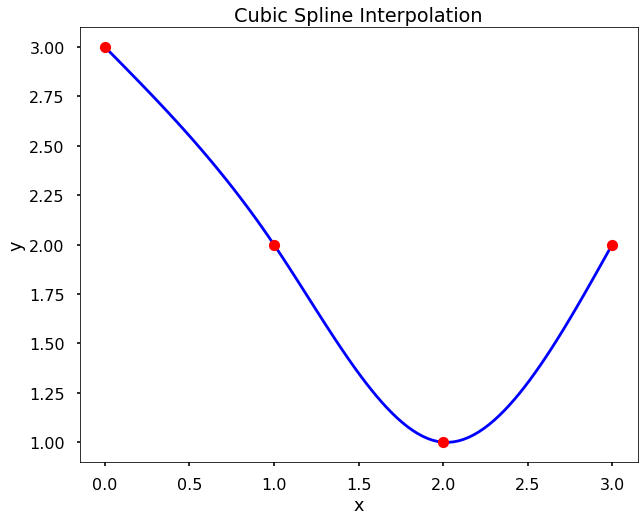

In [16]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

x = [0, 1, 2, 3]
y = [3, 2, 1, 2]

f = CubicSpline(x, y, bc_type='natural') 
x_new = np.linspace(0, 3, 100) 
y_new = f(x_new) 

plt.figure(figsize = (10,8)) 
plt.plot(x_new, y_new, 'b') 
plt.plot(x, y, 'ro') 
plt.title('Cubic Spline Interpolation') 
plt.xlabel('x') 
plt.ylabel('y') 
plt.show() 
